# Week 5 Coding Exercises

In [2]:
!pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25857 sha256=e4e37ca963ff1821874febe53cf0062f3e7d4e8761c56ff603328e2494246e49
  Stored in directory: c:\users\peiqin\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2 as cv
import numpy as np
import imutils as imu
from utils import display_images, matplotlib_show_images

1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use _"lena.jfif"_ as the input image.
    - Use external libraries `imutils`.  
    - Modify the transformation matrix.

In [2]:
img = cv.imread("images/lena.jfif")

In [4]:
# Use external libraries imutils
rotated_bound = imu.rotate_bound(img, 45)
display_images([img, rotated_bound], ("Original", "Rotated"))

In [5]:
# Modify the transformation matrix
# dimensions of the image
height, width = img.shape[:2]
(cX,cY) = (width // 2, height // 2)

# rotation matrix
angle = 45
M = cv.getRotationMatrix2D((cX,cY), angle, 1.0)

# calculate the new bounding dimensions of the image
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
nW = int((height * sin) + (width * cos))
nH = int((height * cos) + (width * sin))

# adjust the rotation matrix to center the rotated image within the new dimensions
M[0, 2] += (nW / 2) - cX
M[1, 2] += (nH / 2) - cY

rotated_image = cv.warpAffine(img, M, (nW, nH))
display_images([img, rotated_image], ("Original", "Rotated"))

2. Use the images with titles: _"flower.jfif"_ and _"native-bee.png"_. I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use `cv.threshold` function to segment the flower. Please refer to [online documentation](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html) for more info. The result should resemble the following:  
![bee and flowers](img_embed/activity3.PNG "bee_flower")

In [ ]:
flower = cv.imread("images/flower.jfif")
bee = cv.imread("images/native-bee.png")

flower = cv.resize(flower, (200, 200))

# grab flower image dimension
flower_height, flower_width = flower.shape[:2]

# mask of the flower and its inverse mask
flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(flower_gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# region of interest (ROI) on the bee image
roi = bee[0:flower_height, 0:flower_width]

# black-out the area of the flower in the ROI
bee_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# crop flower from the flower image
flower_fg = cv.bitwise_and(flower, flower, mask=mask)

# put the flower in the ROI and modify the main image
dst = cv.add(bee_bg, flower_fg)
bee[0:flower_height, 0:flower_width] = dst

display_images([bee], ["flower_bee"])

3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

In [6]:
def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    """
    Randomly crops the central region of an image.

    Args:
        image (np.ndarray): input image.
        min_crop_ratio (float): minimum crop size ratio relative to the image size.
        max_crop_ratio (float): maximum crop size ratio relative to the image size.

    Returns:
        np.ndarray: cropped image.
    """
    height, width = image.shape[:2]

    # calculate random crop size within the specified range
    crop_ratio = np.random.uniform(min_crop_ratio, max_crop_ratio)
    crop_height = int(height * crop_ratio)
    crop_width = int(width * crop_ratio)

    # calculate coordinates for central crop
    start_y = (height - crop_height) // 2
    start_x = (width - crop_width) // 2

    # crop image
    cropped_img = image[start_y:start_y + crop_height, start_x:start_x + crop_width]

    return cropped_img

In [36]:
img = cv.imread("images/lena.jfif") 
cropped_img = random_center_crop(img, 0.5, 0.8)

cv.imshow("Cropped Image", cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()

4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [51]:
# Poisson noise
def add_poisson_noise(image, scale):
    """
    Add Poisson noise to an image.

    Args:
        image (np.ndarray): input image.
        scale: factor to adjust the noise intensity.

    Returns:
        noisy_image (np.ndarray): image with Poisson noise added.
    """
    image_float = image.astype(float)   # convert image to float
    image_float *= scale     # adjust image intensity
    noisy_image = np.random.poisson(image_float)     # add Poisson noise
    
    # clip the values to ensure they are within the valid range and convert back to uint8
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return noisy_image

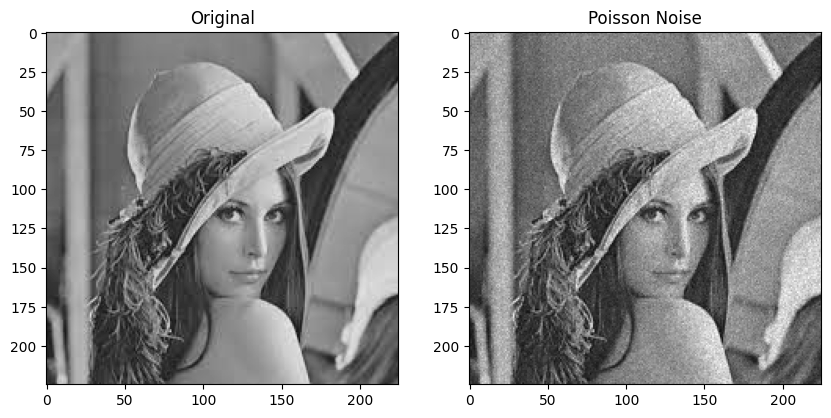

In [53]:
image = cv.imread("images/lena.jfif")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


noisy_image = add_poisson_noise(image, scale=1.0)
matplotlib_show_images([image, noisy_image], nrow=1, ncol=2, titles= ["Original", "Poisson Noise"], axes= True)